# Classificação de imagem usando PyTorch e Transfer Learning

# Princípios

Os modelos pré-treinados são muito utilizados para realizar tarefas mais complexas. Sem essa ferramenta, são necessárias dezenas de milhares de dados para treinar o modelo do zero, ou seja, não temos potência computacional e nem tantos dados para realizar esse tipo de trabalho.

# Objetivo

Precisamos de um produto mínimo viável que posso ser testado nas filiais da empresa. O problema a ser solucionado é a dificuldade em classificar os produtos das lojas.

As classificação de imagem é muito utilizada atualmente em aplicativos de video chamadas para inserir planos de fundos e deixar somente a pessoa, reconhecimento de rostos, documentos em aplicativos de bancos.

Bancos, varejos e qualquer outro ramo que presta algum tipo de serviço e também possuem alguma classificação de imagem, e com isso podem se beneficiar desse tipo de modelo.

As imagens foram obtida no [Google Imagens](https://images.google.com/).

In [1]:
#!pip install torch torchvision pillow scikit-learn gradio

In [2]:
# Bibliotecas utilizadas:

from matplotlib import pyplot as plt
import numpy as np
import os
import PIL.Image

import time
import torch, torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim

In [3]:
# Separando as bases de treino, validação e teste:

diretorio_base_imagens = 'B:/Cursos Extras/Lets_data - Jornada/Projeto 05/Data/raw'
pastas_com_nomes_de_vegetais = os.listdir('B:/Cursos Extras/Lets_data - Jornada/Projeto 05/Data/raw')
pastas_com_nomes_de_vegetais

['batata', 'cenoura', 'limao', 'tomate']

In [4]:
# Separando as imagens nas bases (treino - 80%), (Validação - 10%) e (teste - 10%):

quantidade_por_label = {pasta: len(os.listdir(os.path.join(diretorio_base_imagens, pasta))) for pasta in pastas_com_nomes_de_vegetais}
quantidade_por_label

{'batata': 146, 'cenoura': 181, 'limao': 111, 'tomate': 107}

In [5]:
# Criando as pastas de treino, validação e teste:

diretorio_imagens_processadas = 'B:/Cursos Extras/Lets_data - Jornada/Projeto 05/Data/processed'

dir_treino = os.path.join(diretorio_imagens_processadas, 'treino')
dir_validacao = os.path.join(diretorio_imagens_processadas, 'validacao')
dir_teste = os.path.join(diretorio_imagens_processadas, 'teste')

if not os.path.exists(dir_treino):
    os.makedirs(dir_treino)

if not os.path.exists(dir_validacao):
    os.makedirs(dir_validacao)
    
if not os.path.exists(dir_teste):
    os.makedirs(dir_teste)

In [6]:
# Bibliotecas utilizadas:

import shutil
from sklearn.model_selection import train_test_split

In [7]:
# Criando as pastas de cada classe:

for classe in pastas_com_nomes_de_vegetais:
    dir_classe_treino = os.path.join(dir_treino, classe)
    dir_classe_validacao = os.path.join(dir_validacao, classe)
    dir_classe_teste = os.path.join(dir_teste, classe)
    
    # Criando as pastas:
    if not os.path.exists(dir_classe_treino):
        os.makedirs(dir_classe_treino)
    if not os.path.exists(dir_classe_validacao):
        os.makedirs(dir_classe_validacao)
    if not os.path.exists(dir_classe_teste):
        os.makedirs(dir_classe_teste)
    
    # Caminho completo das pastas com as imagens originais:
    pastas_classe = os.path.join(diretorio_base_imagens, classe)
    
    # Listando todos os arquivos:
    arquivos_classe = os.listdir(pastas_classe)
    
    # Separando a base de treino - 80%:
    treino, valid_teste = train_test_split(arquivos_classe, shuffle=True, test_size=0.2, random_state=42)
    
    # Separando as bases de validação e teste - 10%:
    validacao, teste = train_test_split(valid_teste, shuffle=True, test_size=0.5, random_state=42)
    
    # Deletando a lista valid_teste:
    del valid_teste
    
    print(f'{classe} - treino: {len(treino)} - valid: {len(validacao)} - teste: {len(teste)} - total: {len(arquivos_classe)}')
    
    # Copiando os arquivos para as bases criadas:
    for imagem_treino in treino:
        caminho_original = os.path.join(diretorio_base_imagens, classe, imagem_treino)
        caminho_destino = os.path.join(dir_classe_treino, imagem_treino)
        
        shutil.copy(caminho_original, caminho_destino)
        
    for imagem_validacao in validacao:
        caminho_original = os.path.join(diretorio_base_imagens, classe, imagem_validacao)
        caminho_destino = os.path.join(dir_classe_validacao, imagem_validacao)
        
        shutil.copy(caminho_original, caminho_destino)
        
    for imagem_teste in teste:
        caminho_original = os.path.join(diretorio_base_imagens, classe, imagem_teste)
        caminho_destino = os.path.join(dir_classe_teste, imagem_teste)
        
        shutil.copy(caminho_original, caminho_destino)

batata - treino: 116 - valid: 15 - teste: 15 - total: 146
cenoura - treino: 144 - valid: 18 - teste: 19 - total: 181
limao - treino: 88 - valid: 11 - teste: 12 - total: 111
tomate - treino: 85 - valid: 11 - teste: 11 - total: 107


# Realizando o Pré-Processamento

Vamos realizar o processamento das imagens para utilizar no modelo do PyTorch

In [8]:
# Padronizando o tamanho da imagem:

image_size = 100

In [9]:
# Redimensionando a imagem:

transformacoes_de_imagem = {
    'treino': transforms.Compose([transforms.Resize(size=[image_size, image_size]), transforms.ToTensor(),]),
    'validacao': transforms.Compose([transforms.Resize(size=[image_size, image_size]), transforms.ToTensor(),]),
    'teste': transforms.Compose([transforms.Resize(size=[image_size, image_size]), transforms.ToTensor(),])
}

In [10]:
# Renomeando as bases:

pasta_treino = dir_treino
pasta_validacao = dir_validacao
pasta_teste = dir_teste

pasta_treino, pasta_validacao, pasta_teste

('B:/Cursos Extras/Lets_data - Jornada/Projeto 05/Data/processed\\treino',
 'B:/Cursos Extras/Lets_data - Jornada/Projeto 05/Data/processed\\validacao',
 'B:/Cursos Extras/Lets_data - Jornada/Projeto 05/Data/processed\\teste')

In [11]:
# Definindo o tamanho do Batch dos treinamento:

tamanho_do_batch = 8

In [12]:
# Definindo o número de classes:

numero_de_classes = len(os.listdir(pasta_treino))
numero_de_classes

4

In [13]:
# Carregando as imagens:

data = {
    'treino': datasets.ImageFolder(root=pasta_treino, transform=transformacoes_de_imagem['treino']),
    'validacao': datasets.ImageFolder(root=pasta_validacao, transform=transformacoes_de_imagem['validacao'])
}

In [14]:
# Visualizando os carregamentos:

data

{'treino': Dataset ImageFolder
     Number of datapoints: 433
     Root location: B:/Cursos Extras/Lets_data - Jornada/Projeto 05/Data/processed\treino
     StandardTransform
 Transform: Compose(
                Resize(size=[100, 100], interpolation=bilinear, max_size=None, antialias=None)
                ToTensor()
            ),
 'validacao': Dataset ImageFolder
     Number of datapoints: 55
     Root location: B:/Cursos Extras/Lets_data - Jornada/Projeto 05/Data/processed\validacao
     StandardTransform
 Transform: Compose(
                Resize(size=[100, 100], interpolation=bilinear, max_size=None, antialias=None)
                ToTensor()
            )}

In [15]:
# Mapeando os indeces com os nomes das classes:

indice_para_classe = {indice: classe for classe, indice in data['treino'].class_to_idx.items()}
indice_para_classe

{0: 'batata', 1: 'cenoura', 2: 'limao', 3: 'tomate'}

In [16]:
# Quantidade de imagens para utiliazr nas métricas:

num_imagens_treino = len(data['treino'])
num_imagens_validacao = len(data['validacao'])

num_imagens_treino, num_imagens_validacao

(433, 55)

In [17]:
# Criando o DataLoaders para as bases de treino e validação:

data_loader_treino = DataLoader(data['treino'], batch_size=tamanho_do_batch, shuffle=True)
data_loader_validacao = DataLoader(data['validacao'], batch_size=tamanho_do_batch, shuffle=True)

In [18]:
# Visualizando os DataLoaders:

data_loader_treino, data_loader_validacao

(<torch.utils.data.dataloader.DataLoader at 0x15e73eef940>,
 <torch.utils.data.dataloader.DataLoader at 0x15e73eef670>)

## Visualizando algumas imagens da base de treino para cada classe

In [19]:
# Bibliotecas utilizadas:

from IPython.display import Image

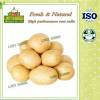

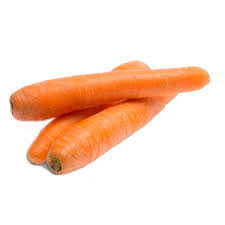

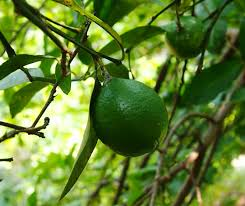

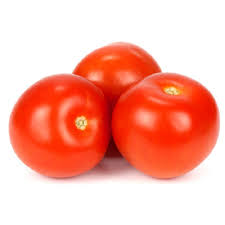

In [20]:
# Visualizando as imagens de cada classe:

for classe in indice_para_classe.values():
    pastas_classe = os.path.join(pasta_treino, classe)
    arquivo_imagem = os.listdir(pastas_classe)[1]
    img = Image(filename=os.path.join(pastas_classe, arquivo_imagem))
    display(img)

## Transfer Learning

In [21]:
# Carregando o modelo:

alexnet = models.alexnet(pretrained=True)

C:\Users\thiag\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\thiag\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [22]:
# Visualizando e analisando a estrutura da alexnet:

alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [23]:
# Congelando os parametros do modelo:

for param in alexnet.parameters():
    param.requires_grad = False

In [24]:
# Alterando o último parametro para o nosso uso:

alexnet.classifier[6] = nn.Linear(4096, numero_de_classes)

In [25]:
# Adicionado na última camada o SoftMax para visualizar a probabilidade:

alexnet.classifier.add_module("7", nn.LogSoftmax(dim = 1))

In [26]:
# Visualizando e analisando a estrutura da alexnet depois da alteração:

alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [27]:
# Visualizando os parametros da última camada da rede:

parametros_ultima_camada = alexnet.classifier[6].parameters()
[parametro for parametro in parametros_ultima_camada][0].requires_grad

True

In [28]:
# Configurando a função de erro:

funcao_erro = nn.CrossEntropyLoss()

## Otimizador

O Otimizador é quem efetivamente muda os pesos da rede de acordo com algum algoritmo

In [29]:
# Configurando o otimizador na última camada:

otimizador = optim.Adam(alexnet.parameters())
otimizador

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    eps: 1e-08
    foreach: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

## Treinando e validando 

O treinamento realiza vários caminhos para frente (forward: previsão), cálculos de erro (distância entre previsão e valor real) e backward (backpropagation: aprendizado com o erro). A cada epoca, todas as imagens do treino são utilizadas para otimizar os parâmetros da rede. Dentro de cada época, utilizamos o treinamento em batch, ao invés de realizar o treinamento de imagem por imagem.

Na validação não realizamos o backpropagation.

In [30]:
def treinar_e_validar(modelo, metrica_erro, otimizador, epocas=10):
    '''
    Função para treinamento e validação
        :param modelo: modelo para treinar e validar
        :param metrica_erro: critério de erro para minização
        :param otimizador: otimizador para alterar os parâmetros da rede
        :param epocas: número de épocas (default=10)
    
    return
        melhor_modelo: modelo treinado com a melhor acurácia na validação
        historico: (dict) - histórico com erro no treinamento, erro na validação e acurácia
    '''
    historico = []
    melhor_acuracia = 0.0
    melhor_modelo = None
    
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    
    print(device)
    
    for epoca in range(epocas):
        inicio_epoca = time.time()
        print(f"\nÉpoca: {epoca+1}/{epocas}")
        
        erro_treino = 0.0
        acertos_treino = 0.0
        
        erro_validacao = 0.0
        acertos_validacao = 0.0
        
        for i, (imagens_lote, y_reais) in enumerate(data_loader_treino):
            imagens_lote = imagens_lote.to(device)
            y_reais = y_reais.to(device)
            
            otimizador.zero_grad()
            
            previsoes = modelo(imagens_lote)
            
            '''
            print(imagens_lote.size()) # Tensor com 8 imagens
            print(previsoes) # Tensor com 8 previsões
            print(torch.exp(previsoes)) # Convertendo para exponencial para ter a probabilidade
                        
            print(torch.max(previsoes.data, 1))
            
            print(y_reais)
            
            for indice in range(tamanho):
                tensor_para_imagem = transforms.ToPILImage()
                imagem = tensor_para_imagem(imagens_lote[indice])
                display(imagem)
            '''
            
            erro = metrica_erro(previsoes, y_reais) # Retorno a média do erro 
            
            erro.backward() # Cálculo dos gradientes
            
            otimizador.step() # Atualizar os coeficientes da rede de acordo com os gradientes
            
            # Cálculos da acurácia:            
            erro_treino += erro.item() * imagens_lote.size(0) # Cálculo do erro total para esse Batch
            
            _, classes_previstas = torch.max(previsoes.data, 1)
            predicoes_corretas = (classes_previstas == y_reais).type(torch.FloatTensor) # Converter os acertos para float
            
            acertos = torch.mean(predicoes_corretas) # Cálcula a média da acurácia
            
            acertos_treino += torch.sum(predicoes_corretas) # Cálcula a acurácia total do treino do lote todo
        
        # Validação 
        with torch.no_grad(): # Desligando o autograd
            
            modelo.eval() # Modificando de treino para validação
            
            for j, (imagens_lote, y_reais) in enumerate(data_loader_validacao): # Iteração de validação
                
                imagens_lote = imagens_lote.to(device)
                y_reais = y_reais.to(device)
                
                previsoes = modelo(imagens_lote) # ForWard pass de validação
                
                erro = metrica_erro(previsoes, y_reais) # Cálculo erro de validação
                
                erro_validacao += erro.item() * imagens_lote.size(0) # Cálculo do erro de validação e adicionar a valid_Loss
                
                _, classes_previstas = torch.max(previsoes.data, 1)
                predicoes_corretas = (classes_previstas == y_reais).type(torch.FloatTensor) # Converter os acertos para float
                
                acertos = torch.mean(predicoes_corretas) # Cálcula a média dos acertos
            
                acertos_validacao += torch.sum(predicoes_corretas) # Cálcula a acurácia total do treino do lote todo
        
        # Cálculando a média de erro e acurácia do treino:
        erro_medio_treino = erro_treino/num_imagens_treino
        acuracia_media_treino = acertos_treino/num_imagens_treino
        
        # Cálculando a média de erro e acurácia da validação:
        erro_medio_validacao = erro_validacao/num_imagens_validacao
        acuracia_media_validacao = acertos_validacao/num_imagens_validacao
        
        # Adicionando no histórico:
        historico.append([erro_medio_treino, erro_medio_validacao, acuracia_media_treino, acuracia_media_validacao])
        
        fim_epoca = time.time()
        
        print(f'Época: {epoca+1:03d}, Treino: erro - {erro_medio_treino:.2f}, Acurácia: {(acuracia_media_treino*100):.2f}%, \n\t\tValidação: erro - {erro_medio_validacao:.2f}, Acurácia: {(acuracia_media_validacao*100):.2f}, Tempo: {(fim_epoca-inicio_epoca):.2f}')
        
        if acuracia_media_validacao > melhor_acuracia:
            melhor_acuracia = acuracia_media_validacao
            melhor_modelo = modelo
            
    return melhor_modelo, historico

In [31]:
# Definindo o número de épocas:

numero_de_epocas = 10

In [32]:
# Treinando o modelo:

modelo_treinado, historico = treinar_e_validar(alexnet, funcao_erro, otimizador, numero_de_epocas)

cpu

Época: 1/10
Época: 001, Treino: erro - 0.30, Acurácia: 89.38%, 
		Validação: erro - 0.10, Acurácia: 94.55, Tempo: 8.24

Época: 2/10
Época: 002, Treino: erro - 0.04, Acurácia: 99.08%, 
		Validação: erro - 0.03, Acurácia: 100.00, Tempo: 7.30

Época: 3/10
Época: 003, Treino: erro - 0.01, Acurácia: 99.77%, 
		Validação: erro - 0.05, Acurácia: 98.18, Tempo: 7.91

Época: 4/10
Época: 004, Treino: erro - 0.01, Acurácia: 99.77%, 
		Validação: erro - 0.04, Acurácia: 98.18, Tempo: 7.37

Época: 5/10
Época: 005, Treino: erro - 0.01, Acurácia: 99.77%, 
		Validação: erro - 0.05, Acurácia: 96.36, Tempo: 8.02

Época: 6/10
Época: 006, Treino: erro - 0.01, Acurácia: 99.77%, 
		Validação: erro - 0.03, Acurácia: 100.00, Tempo: 7.38

Época: 7/10
Época: 007, Treino: erro - 0.00, Acurácia: 100.00%, 
		Validação: erro - 0.04, Acurácia: 96.36, Tempo: 7.82

Época: 8/10
Época: 008, Treino: erro - 0.00, Acurácia: 100.00%, 
		Validação: erro - 0.04, Acurácia: 98.18, Tempo: 7.53

Época: 9/10
Época: 009, Treino:

## Histórico de Treinamento e Validação

Podemos avaliar como foi o desenvolvimento do treinamento a cada época

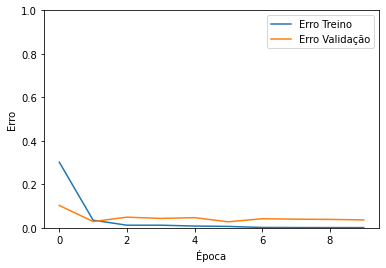

In [33]:
# Mostrando o erro de treinamento e validação:

historico = np.array(historico)

plt.plot(historico[:,0:2])
plt.legend(['Erro Treino', 'Erro Validação'])
plt.xlabel('Época')
plt.ylabel('Erro')
plt.ylim(0,1)
plt.show()

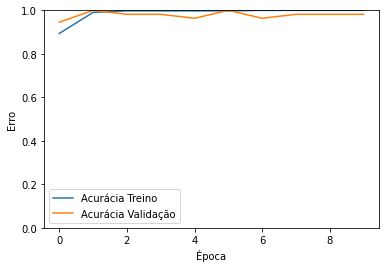

In [34]:
# Mostrando o acurácia de treinamento e validação:

historico = np.array(historico)

plt.plot(historico[:,2:])
plt.legend(['Acurácia Treino', 'Acurácia Validação'])
plt.xlabel('Época')
plt.ylabel('Erro')
plt.ylim(0,1)
plt.show()

# Função de predição

Iremos criar a função para prever a classe de uma imagem com o melhor modelo treinado. É bem parecido com o que fazemos na validação, um 'Forward pass' na rede, sem atualizar os gradientes ou os parâmetros da rede.

In [35]:
def predicao_veg(imagem_teste):
    '''
    Função para realizar a predição
    :param imagem_teste: imagem ja transformada com o PIL
    '''
    
    transformacao = transformacoes_de_imagem['teste']
    
    tensor_imagem_teste = transformacao(imagem_teste)
    
    if torch.cuda.is_available():
        tensor_imagem_teste = tensor_imagem_teste.view(1, 3, image_size, image_size).cuda()
    else:
        tensor_imagem_teste = tensor_imagem_teste.view(1, 3, image_size, image_size)
        
    dict_predicoes = dict()
    
    with torch.no_grad():
        modelo_treinado.eval()
        predicoes_log = modelo_treinado(tensor_imagem_teste) # Modelo retorna as probabilidades em log (Log softmax)
        predicoes = torch.exp(predicoes_log) # Voltar a probabilidade de log para a probabilidade linear
        dict_predicoes = {indice_para_classe[classe]: float(predicoes[0][classe]) for classe in range(numero_de_classes)}
        
    return dict_predicoes

# Previsão em imagens de teste

'batata'

'cenoura'

'limao'

'tomate'

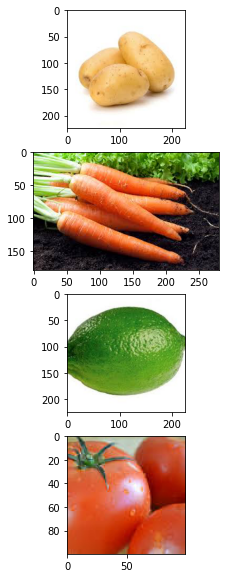

In [36]:
# Testando em cada uma das classes:

figura, plots = plt.subplots(nrows=numero_de_classes, ncols=1, figsize=(5, 10))

for indice, classe in enumerate(pastas_com_nomes_de_vegetais):
    pasta_teste_classe = os.path.join(pasta_teste, classe)
    imagem = os.path.join(pasta_teste_classe, os.listdir(pasta_teste_classe)[2])
    imagem_teste = PIL.Image.open(imagem)
    
    plots[indice].imshow(imagem_teste)
    
    predicoes = predicao_veg(imagem_teste)
    
    display(max(predicoes, key=predicoes.get))

In [37]:
# Realizando a predição_veg e cálculando a acurácia:

def acuracia_teste(pasta_teste):
    acertos = 0
    total_imagens = 0
    
    for classe in os.listdir(pasta_teste):
        pasta_completa = os.path.join(pasta_teste, classe)
        total_imagens += len(os.listdir(pasta_completa))
        
        for imagem in os.listdir(pasta_completa):
            imagem = os.path.join(pasta_completa, imagem)
            imagem_teste = PIL.Image.open(imagem)
            predicoes = predicao_veg(imagem_teste)
            predicao = max(predicoes, key=predicoes.get)
            
            if predicao == classe:
                acertos +=1
                
    return ((acertos/total_imagens)*100)

In [38]:
# Chamando a função de acurácia:

acuracia_teste(pasta_teste)

96.49122807017544

# Deploy do modelo

Vamos utilizar o Gradio para realizar uma aplicação

In [39]:
# Bibliotecas utilizadas:

import gradio as gr

In [40]:
interface_gradio = gr.Interface(fn=predicao_veg, inputs=gr.inputs.Image(type='pil'), outputs='label').launch(share=True)

C:\Users\thiag\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7860/
Running on public URL: https://33445.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)
